In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import squidpy as sq
import numpy as np

from PIL import Image
import networkx as nx
import matplotlib.cm as cmx
import matplotlib.colors as colors

import ncem

usr = !echo $USER
base_path = '.'
base_path_out = '.'

grid_search_dir = '.'
datadir = '.'
targetpath = '.'
configpath = '.'
outdir = base_path_out + '/results/'
figdir = outdir+'/figures/'

sc.logging.print_version_and_date()
sc.settings.verbosity = 0
sc.settings.figdir = figdir


# remove later
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

Running Scanpy 1.7.2, on 2021-06-28 14:21.


# Load data

In [3]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='hartmann',
    data_path=dir_data + 'hartmann/',
    radius=35,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:1447: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  tissue_meta_data = read_excel(self.data_path + "scMEP_sample_description.xlsx", usecols=usecols)
100%|██████████| 58/58 [00:00<00:00, 135.38it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036

 Celldata metadata: {'lateral_resolution': 0.390625, 'fn': ['scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv', 'scMEP_sample_description.xlsx'], 'image_col': 'point', 'pos_cols': ['center_colcoord', 'center_rowcoord'], 'cluster_col': 'Cluster', 'cluster_col_preprocessed': 'Cluster_preprocessed', 'patient_col': 'donor'}


# Supp. Fig. 1: Cell-type centric summary statistics per data set. 

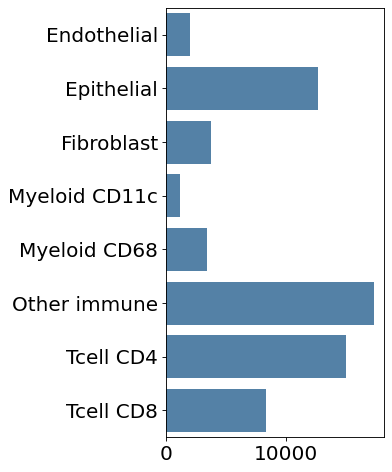

In [23]:
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 6))
sns.barplot(
    y=interpreter.data.celldata.obs.Cluster_preprocessed.value_counts().index,
    x=list(interpreter.data.celldata.obs.Cluster_preprocessed.value_counts()),
    color='steelblue',
    ax=ax
)
ax.grid(False)
#ax.set_yticks([])
plt.tight_layout()
plt.show()

0.0
5.400087997636394
10.193272571484671
50.84876334980765
410.52044893209495
1099.0862068965516


/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:105: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=10)


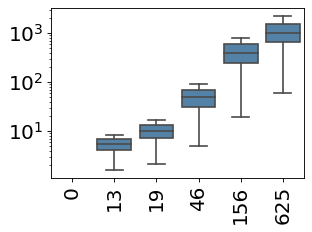

In [22]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 35, 50, 120, 400, 1600],
    lateral_resolution=400/1024,
)

# Supp. Fig. 2: Variance decomposition in spatial omics data sets.

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
100%|██████████| 58/58 [00:35<00:00,  1.65it/s]


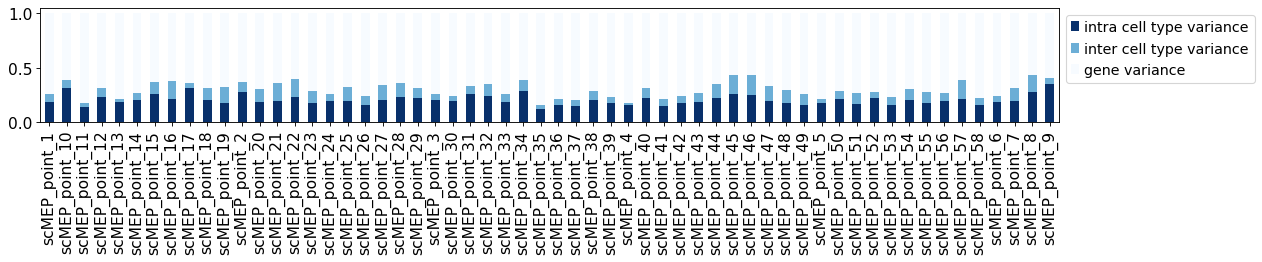

In [4]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='other')
interpreter.data.variance_decomposition(var_decomp, multiindex=False)

In [5]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.203625
inter cell type variance    0.092683
gene variance               0.703692
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

 36%|███▌      | 21/58 [00:00<00:01, 25.06it/s]/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/networkx/linalg/attrmatrix.py:302: RuntimeWarning: invalid value encountered in true_divide
  M /= M.sum(axis=1).reshape((N, 1))
100%|██████████| 58/58 [00:03<00:00, 19.04it/s]


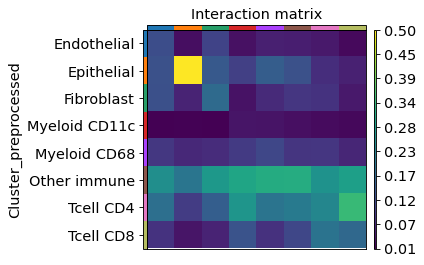

In [6]:
interpreter.data.celldata_interaction_matrix(
    figsize=(3,3),
    fontsize=13
)

# Supp. Fig. 7: Ligand–receptor permutation test. 

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func


n cells: 25498


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

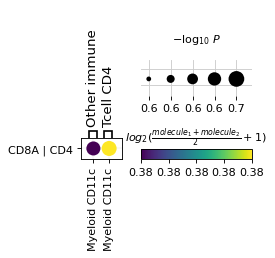

In [7]:
hgnc_names = [
    'H3-4', 
    'VIM', 
    'SMN1', 
    'SLC3A2', 
    'NFE2L2', 
    'CD4', 
    'CD14', 
    'PTPRC', 
    'PDCD1',
    'PECAM1', 
    'SDHA', 
    'MKI67', 
    'CS', 
    'RPS6', 
    'ITGAX', 
    'CD68', 
    'CD36', 
    'ATP5F1A',
    'CD247', 
    'ENTPD1', 
    'VDAC1', 
    'G6PD', 
    'XBP1', 
    'PKM', 
    'SLC1A5', 
    'SLC2A1', 
    'CD8A',
    'B3GAT1', 
    'LDHA', 
    'IDH2', 
    'HK1', 
    'CDH1', 
    'CPT1A', 
    'CKM', 
    'ATP1A1',
    'HIF1A'
]
adata = interpreter.data.ligrec(
    hgnc_names=hgnc_names,
    fraction=0.40,
    fontsize=12,
    width=2.,
)

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

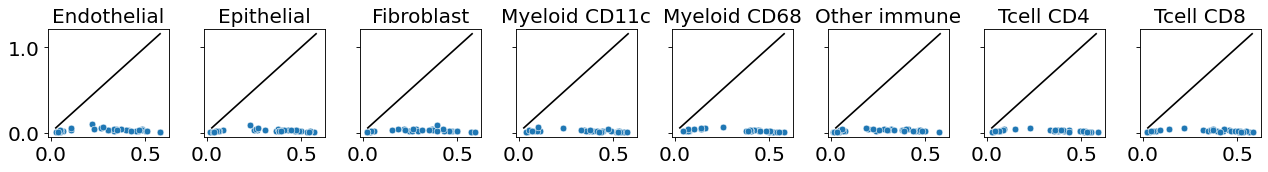

In [8]:
interpreter.data.noise_structure(panel_height=2.5)

# Supp. Fig. 9: Attributing cell heterogeneity to niche composition in Cd8 Tcells in colorectal cancer.

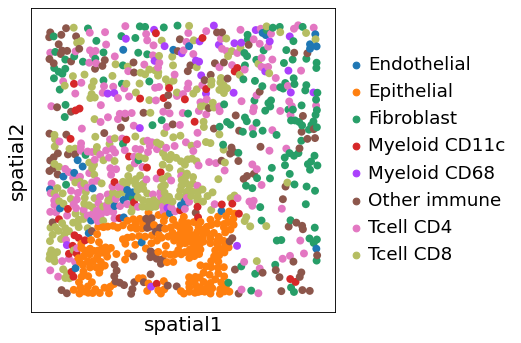

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sc.pl.spatial(
    interpreter.data.img_celldata['scMEP_point_16'],
    color='Cluster_preprocessed',
    spot_size=30,
    title='',
    ax=ax,
    show=False,
)
plt.show()